# Compile Level 2 mock data

In [1]:
import os
import pickle
import numpy as np 
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
#if 'NERSC_HOST' not in os.environ.keys():
#    mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
from gqp_mc import util as UT
from gqp_mc import data as Data 

## read `L-Galaxies` data

In [3]:
# read Lgal spectra of the spectral_challenge mocks 
spec_nonoise, _ = Data.Spectra(sim='lgal', noise='none', lib='fsps')
specs, meta = Data.Spectra(sim='lgal', noise='bgs', lib='fsps') 
# read Lgal photometry of the spectral_challenge mocks 
photo, _ = Data.Photometry(sim='lgal', noise='legacy', lib='fsps') 

(-0.5, 10)

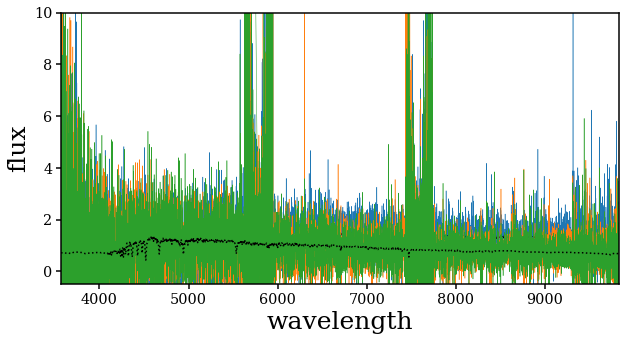

In [4]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in np.random.choice(np.arange(specs['flux'].shape[0]), size=3, replace=False): 
    sub.plot(specs['wave'], specs['flux'][i,:], lw=0.5)
    sub.plot(spec_nonoise['wave'], spec_nonoise['flux'][i,:], c='k', ls=':')
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(specs['wave'].min(), specs['wave'].max())
sub.set_ylabel('flux', fontsize=25)
sub.set_ylim(-0.5, 10)

In [5]:
mag = 22.5 - 2.5 * np.log10(photo['flux'])

/global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(0.0, 1.5)

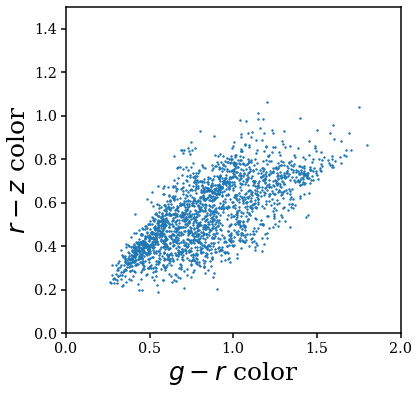

In [7]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(mag[:,0] - mag[:,1], mag[:,1] - mag[:,2], s=2)
sub.set_xlabel('$g-r$ color', fontsize=25)
sub.set_xlim(0., 2)
sub.set_ylabel('$r-z$ color', fontsize=25)
sub.set_ylim(0., 1.5)

Determine flux calibration priors for each galaxy based on measured fiber flux

In [8]:
f_fiber_meas, f_fiber_sigma = [], []
for igal in np.arange(specs['flux'].shape[0]): 
    f_fiber_true = (photo['fiberflux_r_true'][igal]/photo['flux_r_true'][igal])
    prior_width = np.max([0.05, 5.*photo['fiberflux_r_ivar'][igal]**-0.5/photo['flux'][igal,1]])
    f_fiber_meas.append(photo['fiberflux_r_meas'][igal]/photo['flux'][igal,1])
    f_fiber_sigma.append(
        photo['fiberflux_r_meas'][igal]/photo['flux'][igal,1] *
        np.sqrt((photo['fiberflux_r_ivar'][igal]**-0.5/photo['fiberflux_r_meas'][igal])**2 + 
                (photo['ivar'][igal,1]**-0.5/photo['flux'][igal,1])**2))

In [9]:
meta['f_fiber_meas'] = np.array(f_fiber_meas)
meta['f_fiber_sigma'] = np.array(f_fiber_sigma)

In [10]:
pickle.dump(meta, open('/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/l2.theta.p', 'wb'))

In [11]:
np.save('/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/mocha_s2.wave.npy', specs['wave'])
np.save('/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/mocha_s2.flux.npy', specs['flux'])
np.save('/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/mocha_s2.ivar.npy', specs['ivar'])

In [12]:
np.save('/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/mocha_p2.flux.npy', photo['flux'])
np.save('/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/mocha_p2.ivar.npy', photo['ivar'])